### Churn Prediction

Predicting whether a customer will switch to another telecom operator or not.

In [349]:
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Pandas and Numpy
import pandas as pd ,numpy as np
import seaborn as sns

In [350]:
#Importing the data
churn_data = pd.read_csv('data/Telecom_Churn_Data.csv')
data = churn_data.copy()
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [351]:
print('Shape of dataframe: {}'.format(churn_data.shape))

Shape of dataframe: (7043, 21)


In [352]:
print('Datatypes and null value count of the features')
churn_data.info()

Datatypes and null value count of the features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 


- No null variables
- SeniorCitizen, tenure & MonthlyCharges are numerical variables
- customerID, gender, Partnerm Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod & TotalCharges are string/objects

In [353]:
#Numerical data inspection
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [354]:
cols = list(churn_data.columns)
print('List and count of unique values in each feature \n')
for col in cols:
    print('Unique values in {0} : {1}'.format(col, len(churn_data[col].unique())))
    print('Unique Values: {}'.format(churn_data[col].unique()))
    print('*'*100)

List and count of unique values in each feature 

Unique values in customerID : 7043
Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
****************************************************************************************************
Unique values in gender : 2
Unique Values: ['Female' 'Male']
****************************************************************************************************
Unique values in SeniorCitizen : 2
Unique Values: [0 1]
****************************************************************************************************
Unique values in Partner : 2
Unique Values: ['Yes' 'No']
****************************************************************************************************
Unique values in Dependents : 2
Unique Values: ['No' 'Yes']
****************************************************************************************************
Unique values in tenure : 73
Unique Values: [ 1 34  2 45  8 22 10 28 62 13 1

Converting features with Yes/No values to 1/0 respectively. PhoneService, PaperlessBilling, Churn, Partner, Dependents

In [355]:
binary_mapping=['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
print('Features for binary mapping: {}'.format(binary_mapping))

Features for binary mapping: ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']


In [356]:
#Mapping YES and NO to 1 and 0 respectively

def binary_map(x):
    return x.map({'Yes':1,'No':0})

churn_data[binary_mapping] = churn_data[binary_mapping].apply(binary_map)

In [357]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Features for one hot encoding. Contract, PaymentMethod, gender, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies 

In [358]:
#One hot encoding variables with more than 2 values
cat_cols=['Contract','PaymentMethod','gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
         'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in cat_cols:
    dummies = pd.get_dummies(churn_data[col], drop_first=True)
    dummies=dummies.add_prefix(f'{col}_')
    churn_data = pd.concat([churn_data,dummies], axis=1)
    churn_data.drop([col],axis=1,inplace=True)
    
churn_data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,0,0


In [359]:
churn_data.shape

(7043, 32)

In [360]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [361]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [362]:
# Checking for outliers in the continuous variables
num_cols=churn_data[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
90%,69.000000,102.600000,5976.640000,1.000000
95%,72.000000,107.400000,6923.590000,1.000000
99%,72.000000,114.729000,8039.883000,1.000000


The values for different quartiles are increasing gradually. Hence we can conclude that there are no outliers

In [363]:
churn_data.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

<AxesSubplot:xlabel='TotalCharges'>

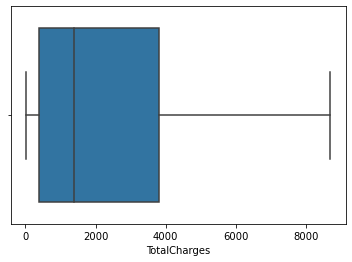

In [364]:
sns.boxplot(x=churn_data["TotalCharges"])

<AxesSubplot:xlabel='MonthlyCharges'>

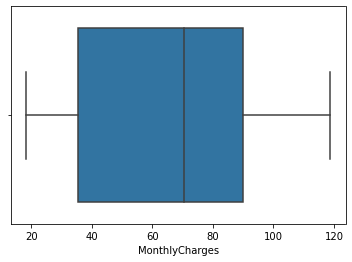

In [365]:
sns.boxplot(x=churn_data["MonthlyCharges"])

<AxesSubplot:xlabel='tenure'>

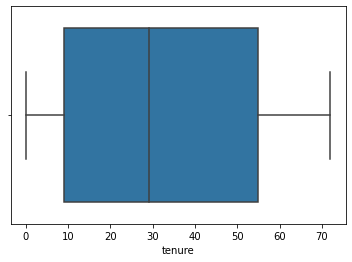

In [366]:
sns.boxplot(x=churn_data["tenure"])

From the above boxplots we can observe that tenure, TotalCharges and MonthlyCharges do not have outliers

In [367]:
round((100*(churn_data.isnull().sum()/len(churn_data.index))),2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No phone service           0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No internet service       0.00
OnlineSecurity_Yes                

TotalCharges have 11 NA entries. This is approximately 0.16% of the total data

Text(0.5, 1.0, '# of Customers by their tenure - month-to-month')

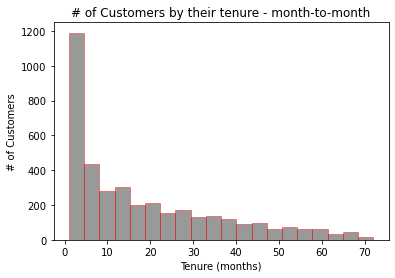

In [368]:
#Relationship between tenure of customers and Month-to-Month Contract

m2m = data[data['Contract']=="Month-to-month"]

ax = sns.distplot(m2m['tenure'], hist=True, kde=False, 
             bins=20, color = 'black',
                 hist_kws={'edgecolor':'red'})

ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure - month-to-month')

For customers with month to month contract, as the tenure increases, the number of customers decreases

Text(0.5, 1.0, '# of Customers by their tenure - One Year')

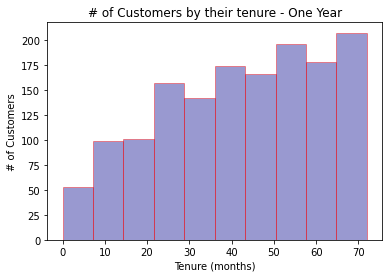

In [369]:
year1 = data[data['Contract']=="One year"]

ax = sns.distplot(year1['tenure'], hist=True, kde=False, 
             bins=10, color = 'darkblue',
                 hist_kws={'edgecolor':'red'})

ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure - One Year')

For customers with one year contract, as the tenure increases, the number of customers increase

Text(0.5, 1.0, '# of Customers by their tenure - Two Year')

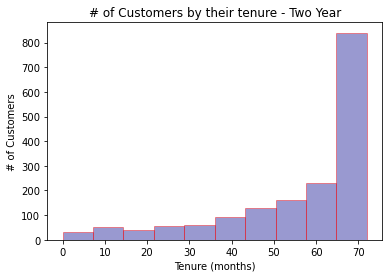

In [370]:
year2 = data[data['Contract']=="Two year"]

ax = sns.distplot(year2['tenure'], hist=True, kde=False, 
             bins=10, color = 'darkblue',
                 hist_kws={'edgecolor':'red'})

ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure - Two Year')

For customers with two year contract, as the tenure increases, the number of customers increase

###### Contract and Tenure - Most of the people with Month-to-month contract stay for less than 10 months whereas most of the people with Two year contracts stat for more than 60 months

Churn Yes: 1869
Churn No: 5174


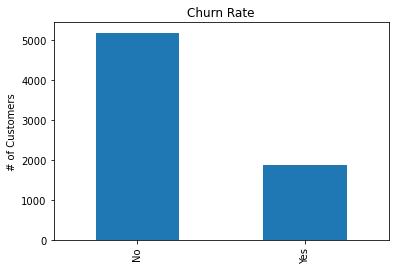

In [371]:
p1 = data['Churn'].value_counts().plot(kind='bar')
p1.set_ylabel('# of Customers')
p1.set_title('Churn Rate')
print('Churn Yes: {}'.format((data['Churn']=='Yes').sum()))
print('Churn No: {}'.format((data['Churn']=='No').sum()))

###### Churn Rate - The dataset is not balanced properly.  Churn No is more than 2x the number of Churn Yes. This indicates that our data is skewed

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

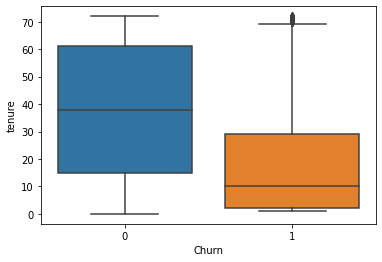

In [372]:
sns.boxplot(x=churn_data.Churn, y=churn_data.tenure)

In [373]:
a = churn_data.groupby('Churn')
a.describe()

SeniorCitizen                                              Partner  \
              count      mean       std  min  25%  50%  75%  max   count   
Churn                                                                      
0            5174.0  0.128721  0.334923  0.0  0.0  0.0  0.0  1.0  5174.0   
1            1869.0  0.254682  0.435799  0.0  0.0  0.0  1.0  1.0  1869.0   

                 ... StreamingMovies_No internet service       \
           mean  ...                                 75%  max   
Churn            ...                                            
0      0.528218  ...                                 1.0  1.0   
1      0.357945  ...                                 0.0  1.0   

      StreamingMovies_Yes                                               
                    count      mean       std  min  25%  50%  75%  max  
Churn                                                                   
0                  5174.0  0.369927  0.482831  0.0  0.0  0.0  1.0  1.0  
1                  1869.0  0.437667  0.496232  0.0  0.0  0.0  1.0  1.0  

[2 rows x 240 columns]

###### Churn vs Tenure
- If the customer does not churn in first 15-20 months, he/she tends to stay for a longer tenure

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


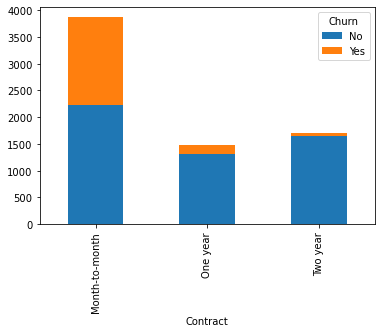

In [374]:
churn_contract = data.groupby(['Contract','Churn']).size().unstack()
churn_contract.plot(kind='bar', stacked=True)
print(churn_contract)

###### Churn vs Contract type
- The churn% is very low if contract type is one year/ two year
- The churn ratio (Yes:No) is 57:43 for month to month contract type

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476


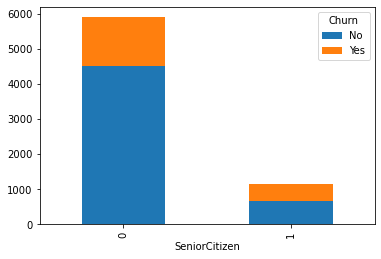

In [375]:
#Plotting SeniorCitizen(Yes/No) and Churn
churn_senior = data.groupby(['SeniorCitizen','Churn']).size().unstack()
churn_senior.plot(kind='bar', stacked=True)
print(churn_senior)

In [376]:
churn_senior

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


###### Churn vs Senior Citizen
- The churn rate is low (~24%) in case of non senior citizens
- The churn rate is comparitively on the higher side (~42%) in case of senior citizens

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

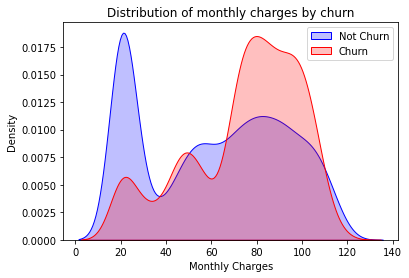

In [377]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                color="Red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

###### Churn vs Monthly Charges
- If monthly charges is on the lower side (0-40) then the churn rate is lower
- If monthly charges is on the higher side (65-110) then the churn rate is higher

Text(0.5, 1.0, 'Distribution of Total charges by churn')

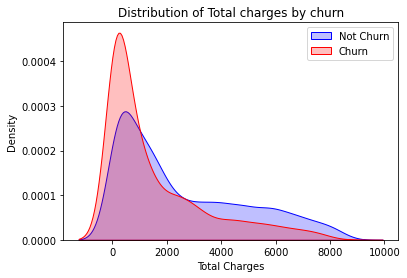

In [378]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
            color="Red", shade= True)

ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total charges by churn')

###### Churn vs Total charges
- The churn rate is higher if the total charges are on the lower side

In [379]:
#0.16% of TotalCharges is missing.Let's drop these since the percentage is very less

churn_data=churn_data[~np.isnan(churn_data['TotalCharges'])]

In [380]:
from sklearn.model_selection import train_test_split

Splitting into independent and dependent variables

Dropping 'CustomerID' since it is irrelevent here. 'Churn' is the target variable here.

In [381]:
X = churn_data.drop(['Churn','customerID'],axis=1)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,0,0,0,0,0,0,0,0,0,0


In [382]:
y = churn_data['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

Splitting train and test data. 70% as training set, remaining 30% as testing set

In [383]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [384]:
print('Training data shape: {}'.format(X_train.shape))
print('Testing data shape: {}'.format(X_test.shape))

Training data shape: (4922, 30)
Testing data shape: (2110, 30)


In [385]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

In [386]:
print('Max of tenure: {}, Min of tenure:{}'.format(X_train['tenure'].max(),X_train['tenure'].min()))
print('Max of MonthlyCharges: {}, Min of MonthlyCharges:{}'.format(X_train['MonthlyCharges'].max(),X_train['MonthlyCharges'].min()))
print('Max of TotalCharges: {}, Min of TotalCharges:{}'.format(X_train['TotalCharges'].max(),X_train['TotalCharges'].min()))

Max of tenure: 72, Min of tenure:1
Max of MonthlyCharges: 118.6, Min of MonthlyCharges:18.25
Max of TotalCharges: 8684.8, Min of TotalCharges:18.85


Values are not is the same scale. Using MinMax scaler to scale it.

In [387]:
scaler = MinMaxScaler()
scale_cols = ['tenure','MonthlyCharges','TotalCharges']

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
3946,0,0,0,0.112676,0,0,0.401096,0.060120,0,0,...,0,0,0,1,0,1,0,1,0,1
3394,0,0,0,0.352113,1,0,0.431490,0.180373,1,0,...,0,1,0,0,0,0,0,0,0,0
1635,0,0,0,0.028169,1,1,0.515197,0.023263,1,0,...,0,0,0,1,0,0,0,1,0,1
4088,0,0,0,0.084507,1,0,0.551570,0.057830,0,0,...,0,0,0,0,0,0,0,0,0,0
1886,0,1,1,0.929577,1,1,0.420030,0.454059,0,1,...,0,0,0,1,0,1,0,0,0,0


MinMax scaler will scale the variables in 0 to 1 range. After scaling the variables

In [388]:
print('Max of tenure: {}, Min of tenure:{}'.format(X_train['tenure'].max(),X_train['tenure'].min()))
print('Max of MonthlyCharges: {}, Min of MonthlyCharges:{}'.format(X_train['MonthlyCharges'].max(),X_train['MonthlyCharges'].min()))
print('Max of TotalCharges: {}, Min of TotalCharges:{}'.format(X_train['TotalCharges'].max(),X_train['TotalCharges'].min()))

Max of tenure: 1.0, Min of tenure:0.0
Max of MonthlyCharges: 1.0, Min of MonthlyCharges:0.0
Max of TotalCharges: 1.0000000000000002, Min of TotalCharges:0.0


In [389]:
#Percentage of churn data
churn = sum(churn_data['Churn'])/len(churn_data['Churn'])*100

print('Number of churn (1) entries in the full dataset {}%'.format(round(churn,2)))

Number of churn (1) entries in the full dataset 26.58%


In [390]:
#Percentage of churn data
churn = sum(y_train)/len(y_train)*100

print('Number of churn (1) entries in the training dataset {}%'.format(round(churn,2)))

Number of churn (1) entries in the training dataset 26.57%


In [391]:
import matplotlib.pyplot as plt
%matplotlib inline

In [392]:
churn_data.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
SeniorCitizen,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541,-0.046491,...,-0.182519,0.066663,-0.182519,0.059514,-0.182519,-0.060577,-0.182519,0.105445,-0.182519,0.119842
Partner,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982,0.083067,...,-0.000286,0.141849,-0.000286,0.153556,-0.000286,0.120206,-0.000286,0.124483,-0.000286,0.118108
Dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128,0.069222,...,0.138383,0.023639,0.138383,0.013900,0.138383,0.063053,0.138383,-0.016499,0.138383,-0.038375
tenure,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049,0.202338,...,-0.037529,0.361138,-0.037529,0.361520,-0.037529,0.325288,-0.037529,0.280264,-0.037529,0.285402
PhoneService,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691,-0.003142,...,0.171817,-0.052133,0.171817,-0.070076,0.171817,-0.095138,0.171817,-0.021383,0.171817,-0.033477
PaperlessBilling,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454,-0.052278,...,-0.320592,0.127056,-0.320592,0.104079,-0.320592,0.037536,-0.320592,0.224241,-0.320592,0.211583
MonthlyCharges,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858,0.004810,...,-0.763191,0.441529,-0.763191,0.482607,-0.763191,0.338301,-0.763191,0.629668,-0.763191,0.627235
TotalCharges,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484,0.170569,...,-0.374878,0.510100,-0.374878,0.522881,-0.374878,0.432868,-0.374878,0.515709,-0.374878,0.519867
Churn,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000,-0.178225,...,-0.227578,-0.082307,-0.227578,-0.066193,-0.227578,-0.164716,-0.227578,0.063254,-0.227578,0.060860
Contract_One year,-0.046491,0.083067,0.069222,0.202338,-0.003142,-0.052278,0.004810,0.170569,-0.178225,1.000000,...,0.038061,0.084113,0.038061,0.102911,0.038061,0.096258,0.038061,0.061930,0.038061,0.064780


<AxesSubplot:>

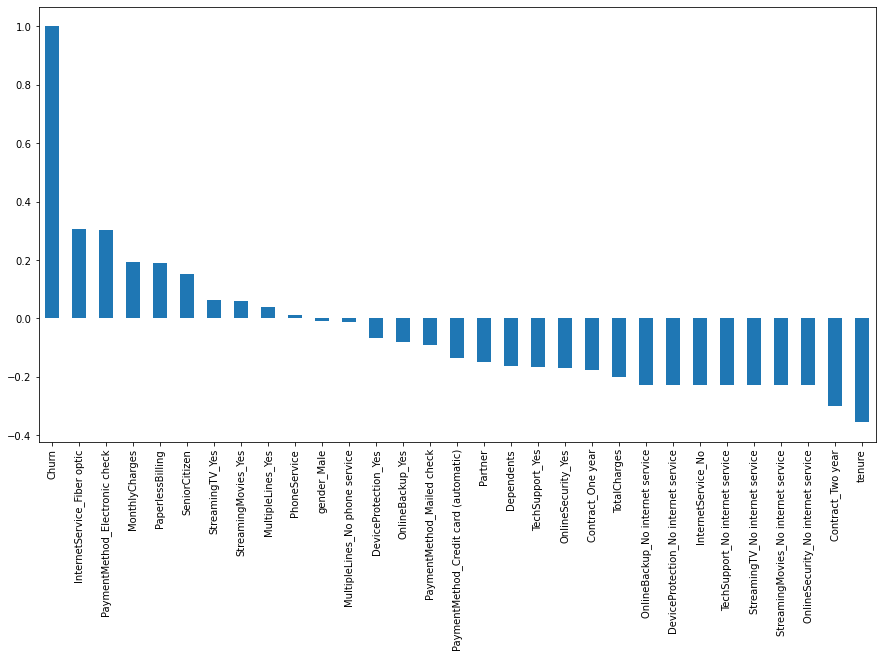

In [393]:
plt.figure(figsize=(15,8))
churn_data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [394]:
import statsmodels.api as sm

Using all <b>30</b> features

In [395]:
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logm1 = logm1.fit()

In [396]:
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.1
Date:                Sat, 03 Dec 2022   Deviance:                       4042.2
Time:                        18:11:48   Pearson chi2:                 5.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2859
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5363      0.446      1.202      0.230      -0.339       1.411
SeniorCitizen                             0.2268      0.101      2.235      0.025       0.028       0.426
Partner                                   0.1332      0.094      1.420      0.155      -0.051       0.317
Dependents                               -0.2451      0.109     -2.240      0.025      -0.460      -0.031
tenure                                   -4.3871      0.540     -8.128      0.000      -5.445      -3.329
PhoneService                              0.5449      0.606      0.899      0.369      -0.643       1.733
PaperlessBilling                          0.2066      0.089      2.327      0.020       0.033       0.381
MonthlyCharges                           -5.5918      3.856     -1.450      0.147     -13.149       1.965
TotalCharges                              2.9458      0.745      3.956      0.000       1.486       4.405
Contract_One year                        -0.8185      0.133     -6.177      0.000      -1.078      -0.559
Contract_Two year                        -1.4284      0.209     -6.823      0.000      -1.839      -1.018
PaymentMethod_Credit card (automatic)    -0.1625      0.137     -1.186      0.236      -0.431       0.106
PaymentMethod_Electronic check            0.2029      0.113      1.790      0.073      -0.019       0.425
PaymentMethod_Mailed check               -0.1224      0.138     -0.886      0.376      -0.393       0.148
gender_Male                              -0.0202      0.078     -0.259      0.796      -0.173       0.133
MultipleLines_No phone service           -0.0086      0.200     -0.043      0.966      -0.401       0.383
MultipleLines_Yes                         0.4650      0.214      2.173      0.030       0.046       0.884
InternetService_Fiber optic               2.1963      0.965      2.275      0.023       0.304       4.088
InternetService_No                       -0.3074      0.139     -2.204      0.028      -0.581      -0.034
OnlineSecurity_No internet service       -0.3074      0.139     -2.204      0.028      -0.581      -0.034
OnlineSecurity_Yes                       -0.1314      0.215     -0.610      0.542      -0.553       0.291
OnlineBackup_No internet service         -0.3074      0.139     -2.204      0.028      -0.581      -0.034
OnlineBackup_Yes                          0.1700      0.212      0.803      0.422      -0.245       0.585
DeviceProtection_No internet service     -0.3074      0.139     -2.204      0.028      -0.581      -0.034
DeviceProtection_Yes                      0.2282      0.212      1.078      0.281      -0.187       0.643
TechSupport_No internet service          -0.3074      0.139     -2.204      0.028      -0.581      -0.034
TechSuppo

In [397]:
print("Coefficient of the features:")
logm1.params.sort_values()

Coefficient of the features:


MonthlyCharges                          -5.591847
tenure                                  -4.387135
Contract_Two year                       -1.428355
Contract_One year                       -0.818548
OnlineSecurity_No internet service      -0.307355
OnlineBackup_No internet service        -0.307355
StreamingTV_No internet service         -0.307355
TechSupport_No internet service         -0.307355
DeviceProtection_No internet service    -0.307355
InternetService_No                      -0.307355
StreamingMovies_No internet service     -0.307355
Dependents                              -0.245105
PaymentMethod_Credit card (automatic)   -0.162532
OnlineSecurity_Yes                      -0.131412
PaymentMethod_Mailed check              -0.122359
TechSupport_Yes                         -0.099971
gender_Male                             -0.020155
MultipleLines_No phone service          -0.008571
Partner                                  0.133242
OnlineBackup_Yes                         0.170038


In [398]:
#Feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [399]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg)
rfe=rfe.fit(X_train,y_train)

In [400]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True,
        True, False,  True, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False,  True, False,
        True, False,  True])

In [401]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 11),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', False, 5),
 ('MonthlyCharges', False, 2),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 12),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 13),
 ('gender_Male', False, 15),
 ('MultipleLines_No phone service', False, 7),
 ('MultipleLines_Yes', False, 3),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('OnlineSecurity_No internet service', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_No internet service', True, 1),
 ('OnlineBackup_Yes', False, 14),
 ('DeviceProtection_No internet service', False, 4),
 ('DeviceProtection_Yes', False, 16),
 ('TechSupport_No internet service', False, 8),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_No internet service', False,

In [402]:
col = X_train.columns[rfe.support_]
col

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'TotalCharges',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [403]:
#Columns not selected by rfe
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PaperlessBilling', 'MonthlyCharges',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service'],
      dtype='object')

Performed recursive feature elimination to reduce the number of features to <b>15</b>

In [404]:
X_train_rfe = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial())
logm2_result = logm2.fit()
logm2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.9
Date:                Sat, 03 Dec 2022   Deviance:                       4063.8
Time:                        18:12:10   Pearson chi2:                 5.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2828
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0726      0.158      0.459      0.646      -0.237       0.382
SeniorCitizen                          0.2916      0.099      2.945      0.003       0.098       0.486
tenure                                -4.2616      0.526     -8.103      0.000      -5.292      -3.231
PhoneService                          -0.5145      0.157     -3.282      0.001      -0.822      -0.207
TotalCharges                           2.9249      0.714      4.098      0.000       1.526       4.324
Contract_One year                     -0.8882      0.131     -6.791      0.000      -1.145      -0.632
Contract_Two year                     -1.5031      0.208     -7.237      0.000      -1.910      -1.096
PaymentMethod_Electronic check         0.3195      0.083      3.871      0.000       0.158       0.481
InternetService_Fiber optic            0.8871      0.116      7.621      0.000       0.659       1.115
InternetService_No                    -0.2617      0.054     -4.887      0.000      -0.367      -0.157
OnlineSecurity_No internet service    -0.2617      0.054     -4.887      0.000      -0.367      -0.157
OnlineSecurity_Yes                    -0.4156      0.101     -4.102      0.000      -0.614      -0.217
OnlineBackup_No internet service      -0.2617      0.054     -4.887      0.000      -0.367      -0.157
TechSupport_Yes                       -0.3923      0.103     -3.814      0.000      -0.594      -0.191
StreamingTV_Yes                        0.2256      0.096      2.345      0.019       0.037       0.414
StreamingMovies_Yes                    0.2263      0.097      2.344      0.019       0.037       0.415
======================================================================================================
"""

In [405]:
# Getting the predicted values on the train set
y_train_pred=logm2_result.predict(X_train_rfe)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35713902, 0.0832267 , 0.35187993, 0.63960007, 0.00455767,
       0.00242706, 0.17686836, 0.00812727, 0.50478918, 0.08175781])

In [406]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.357139,3946
1,0,0.083227,3394
2,0,0.351880,1635
3,1,0.639600,4088
4,0,0.004558,1886


In [407]:
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].map(lambda x : 1 if x>0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.357139,3946,0
1,0,0.083227,3394,0
2,0,0.351880,1635,0
3,1,0.639600,4088,1
4,0,0.004558,1886,0


In [408]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['predicted'])
confusion

array([[3223,  391],
       [ 583,  725]])

In [409]:
#accuracy
print(metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['predicted']))

0.8021129622104836


In [410]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [411]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,InternetService_No,inf
9,OnlineSecurity_No internet service,inf
11,OnlineBackup_No internet service,inf
3,TotalCharges,15.40
1,tenure,15.00
2,PhoneService,6.74
7,InternetService_Fiber optic,4.03
5,Contract_Two year,3.47
13,StreamingTV_Yes,2.66
14,StreamingMovies_Yes,2.66


Dropping InternetServices_No, OnlineSecurity_No internet service and OnlineBackup_No internet service

In [412]:
col = col.drop(['InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service'], 1)
col

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'TotalCharges',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [413]:
X_train_rfe2 = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_rfe2, family=sm.families.Binomial())
logm3_result = logm3.fit()
logm3_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2044.3
Date:                Sat, 03 Dec 2022   Deviance:                       4088.6
Time:                        18:12:25   Pearson chi2:                 5.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2791
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0092      0.157     -0.059      0.953      -0.316       0.298
SeniorCitizen                      0.3116      0.099      3.144      0.002       0.117       0.506
tenure                            -4.3283      0.510     -8.487      0.000      -5.328      -3.329
PhoneService                      -0.7798      0.149     -5.232      0.000      -1.072      -0.488
TotalCharges                       3.0432      0.691      4.404      0.000       1.689       4.398
Contract_One year                 -0.9633      0.129     -7.462      0.000      -1.216      -0.710
Contract_Two year                 -1.6391      0.204     -8.025      0.000      -2.039      -1.239
PaymentMethod_Electronic check     0.3735      0.082      4.568      0.000       0.213       0.534
InternetService_Fiber optic        1.1219      0.108     10.363      0.000       0.910       1.334
OnlineSecurity_Yes                -0.3159      0.101     -3.139      0.002      -0.513      -0.119
TechSupport_Yes                   -0.2950      0.102     -2.882      0.004      -0.496      -0.094
StreamingTV_Yes                    0.2646      0.097      2.735      0.006       0.075       0.454
StreamingMovies_Yes                0.2637      0.097      2.714      0.007       0.073       0.454
==================================================================================================
"""

In [414]:
y_train_pred=logm3_result.predict(X_train_rfe2).values.reshape(-1)
y_train_pred[:10]

array([0.40214777, 0.06477728, 0.28871595, 0.62633432, 0.00339949,
       0.00314481, 0.14979554, 0.01068464, 0.48418171, 0.0739984 ])

In [415]:
y_train_pred_final['Churn_Prob']=y_train_pred

In [416]:
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].map(lambda x : 1 if x>0.5 else 0)

In [417]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.402148,3946,0
1,0,0.064777,3394,0
2,0,0.288716,1635,0
3,1,0.626334,4088,1
4,0,0.003399,1886,0


In [418]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8017066233238521


In [419]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3235,  379],
       [ 597,  711]])

In [421]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,tenure,14.10
3,TotalCharges,14.01
2,PhoneService,4.24
7,InternetService_Fiber optic,3.77
5,Contract_Two year,3.22
10,StreamingTV_Yes,2.65
11,StreamingMovies_Yes,2.65
4,Contract_One year,1.96
9,TechSupport_Yes,1.92
6,PaymentMethod_Electronic check,1.83


tenure and totalCharges have a very high VIF value. This indicates high level of multi colinearity. We'll start with dropping tenure first

In [422]:
col = col.drop(['tenure'], 1)

In [423]:
X_train_rfe3 = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_rfe3, family=sm.families.Binomial())
logm4_result = logm4.fit()
logm4_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2088.7
Date:                Sat, 03 Dec 2022   Deviance:                       4177.3
Time:                        18:13:50   Pearson chi2:                 4.91e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2660
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.7159      0.133     -5.393      0.000      -0.976      -0.456
SeniorCitizen                      0.2753      0.099      2.784      0.005       0.082       0.469
PhoneService                      -0.4856      0.139     -3.501      0.000      -0.758      -0.214
TotalCharges                      -2.5103      0.250    -10.053      0.000      -3.000      -2.021
Contract_One year                 -1.1650      0.124     -9.387      0.000      -1.408      -0.922
Contract_Two year                 -2.0286      0.193    -10.535      0.000      -2.406      -1.651
PaymentMethod_Electronic check     0.3817      0.082      4.680      0.000       0.222       0.542
InternetService_Fiber optic        1.4340      0.103     13.986      0.000       1.233       1.635
OnlineSecurity_Yes                -0.2606      0.100     -2.596      0.009      -0.457      -0.064
TechSupport_Yes                   -0.1760      0.101     -1.737      0.082      -0.375       0.023
StreamingTV_Yes                    0.4042      0.095      4.267      0.000       0.219       0.590
StreamingMovies_Yes                0.4174      0.095      4.395      0.000       0.231       0.603
==================================================================================================
"""

In [424]:
len(col)

11

In [425]:
y_train_pred=logm4_result.predict(X_train_rfe3).values.reshape(-1)
y_train_pred[:10]

y_train_pred_final['Churn_Prob']=y_train_pred

y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].map(lambda x : 1 if x>0.5 else 0)

#confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
#confusion

In [426]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3216,  398],
       [ 598,  710]])

In [427]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7976432344575376


The accuracy is almost same after dropping tenure.

In [428]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,TotalCharges,5.80
1,PhoneService,3.61
6,InternetService_Fiber optic,3.41
9,StreamingTV_Yes,2.62
10,StreamingMovies_Yes,2.62
4,Contract_Two year,2.38
8,TechSupport_Yes,1.89
5,PaymentMethod_Electronic check,1.80
7,OnlineSecurity_Yes,1.79
3,Contract_One year,1.71


Drop TotalCharges

In [429]:
col = col.drop(['TotalCharges'], 1)

In [430]:
X_train_rfe4 = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_rfe4, family=sm.families.Binomial())
logm5_result = logm5.fit()
logm5_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2141.9
Date:                Sat, 03 Dec 2022   Deviance:                       4283.7
Time:                        18:16:33   Pearson chi2:                 4.77e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2500
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.6375      0.132     -4.825      0.000      -0.897      -0.379
SeniorCitizen                      0.1682      0.096      1.760      0.078      -0.019       0.356
PhoneService                      -0.5516      0.140     -3.954      0.000      -0.825      -0.278
Contract_One year                 -1.6222      0.117    -13.808      0.000      -1.852      -1.392
Contract_Two year                 -2.6819      0.185    -14.519      0.000      -3.044      -2.320
PaymentMethod_Electronic check     0.4509      0.079      5.682      0.000       0.295       0.606
InternetService_Fiber optic        1.0835      0.095     11.364      0.000       0.897       1.270
OnlineSecurity_Yes                -0.4760      0.096     -4.933      0.000      -0.665      -0.287
TechSupport_Yes                   -0.3334      0.099     -3.381      0.001      -0.527      -0.140
StreamingTV_Yes                    0.1984      0.091      2.192      0.028       0.021       0.376
StreamingMovies_Yes                0.1744      0.090      1.938      0.053      -0.002       0.351
==================================================================================================
"""

In [431]:
y_train_pred=logm5_result.predict(X_train_rfe4).values.reshape(-1)
y_train_pred[:10]

y_train_pred_final['Churn_Prob']=y_train_pred

y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].map(lambda x : 1 if x>0.5 else 0)

In [432]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3156,  458],
       [ 616,  692]])

In [433]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7817960178789111


In [301]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,PhoneService,3.60
5,InternetService_Fiber optic,2.82
8,StreamingTV_Yes,2.47
9,StreamingMovies_Yes,2.45
3,Contract_Two year,1.85
7,TechSupport_Yes,1.81
4,PaymentMethod_Electronic check,1.77
6,OnlineSecurity_Yes,1.64
2,Contract_One year,1.52
0,SeniorCitizen,1.28


No more dropping of variables required now

In [336]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7817960178789111


In [337]:
TP=confusion[1,1] #true positive
TN=confusion[0,0] #true negartive
FP=confusion[0,1] #false positive
FN=confusion[1,0] #false negative

In [338]:
#Sensitivity
print('Sensitivity: {}'.format(TP/(TP+FN)))
print('Specivity: {}'.format(TN/(TN+FP)))
print('False positive rate: {}'.format(FP/(FP+TN)))
print('Positive prediction value: {}'.format(TP/(TP+FP)))
print('Negative prediction value: {}'.format(TN/(TN+FN)))

Sensitivity: 0.5290519877675841
Specivity: 0.8732706142778085
False positive rate: 0.12672938572219147
Positive prediction value: 0.6017391304347826
Negative prediction value: 0.8366914103923648


### ROC Curve

In [437]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs)
    plt.figure(figsize=(5,5))
    
    plt.plot(fpr,tpr,label="ROC curve")
    plt.plot([0,1],[0,1],'k--')
    
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    
    plt.title('ROC')
    plt.legend()
    plt.show()
    
    return None

In [438]:
 fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final['Churn'],y_train_pred_final['Churn_Prob'],drop_intermediate=True)

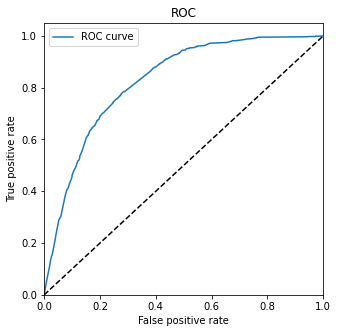

In [439]:

draw_roc(y_train_pred_final['Churn'],y_train_pred_final['Churn_Prob'])

Predicting the value for different churn threshold

In [440]:
numbers=[float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Churn_Prob'].map(lambda x :1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.254631,3946,0,1,1,1,0,0,0,0,0,0,0
1,0,0.055384,3394,0,1,0,0,0,0,0,0,0,0,0
2,0,0.120506,1635,0,1,1,0,0,0,0,0,0,0,0
3,1,0.585451,4088,1,1,1,1,1,1,1,0,0,0,0
4,0,0.009190,1886,0,1,0,0,0,0,0,0,0,0,0


In [441]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print('Metrices for various threshold values for prob(0-0.9)')
print(cutoff_df)

Metrices for various threshold values for prob(0-0.9)
     prob  accuracy     sensi     speci
0.0   0.0  0.265746  1.000000  0.000000
0.1   0.1  0.610118  0.951070  0.486718
0.2   0.2  0.667615  0.892966  0.586054
0.3   0.3  0.749898  0.747706  0.750692
0.4   0.4  0.775498  0.652141  0.820144
0.5   0.5  0.781796  0.529052  0.873271
0.6   0.6  0.772450  0.290520  0.946873
0.7   0.7  0.741365  0.047401  0.992529
0.8   0.8  0.734254  0.000000  1.000000
0.9   0.9  0.734254  0.000000  1.000000


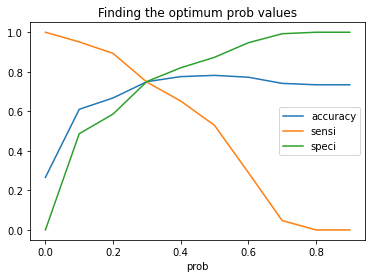

In [442]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Finding the optimum prob values')
plt.show()

0.3 looks to be a suitable value from the graph

In [443]:
y_train_pred_final['Final_predictions(0.3)'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predictions(0.3)
0,1,0.254631,3946,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.055384,3394,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.120506,1635,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.585451,4088,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.009190,1886,0,1,0,0,0,0,0,0,0,0,0,0


In [444]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final['Final_predictions(0.3)'])

0.7498984152783421

In [445]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final['Final_predictions(0.3)'] )
confusion2

array([[2713,  901],
       [ 330,  978]])

In [446]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [447]:
#Sensitivity
TP / float(TP+FN)

0.7477064220183486

In [448]:
#Specificity
TN / float(TN+FP)

0.7506917542888766

### Test set predictions

In [449]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [450]:
X_test = X_test[col]
X_test.head()

,SeniorCitizen,PhoneService,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
2481,1,1,0,1,0,0,0,0,0,0
6784,0,1,0,0,0,0,0,0,0,0
6125,0,1,0,0,0,1,0,0,1,1
3052,0,1,0,0,0,0,1,0,0,0
4099,0,0,0,0,0,0,1,0,0,0


In [451]:
X_test_sm = sm.add_constant(X_test)

In [452]:
y_test_pred = logm5_result.predict(X_test_sm)

In [453]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
2481,0.024061
6784,0.233406
6125,0.566385
3052,0.159068
4099,0.247211


In [454]:
y_test_df = pd.DataFrame(y_test)

In [455]:
y_test_df['CustID'] = y_test_df.index

In [456]:

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [457]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [458]:
y_pred_final.head()

,Churn,CustID,0
0,0,2481,0.024061
1,0,6784,0.233406
2,1,6125,0.566385
3,0,3052,0.159068
4,0,4099,0.247211


In [459]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [460]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
y_pred_final = y_pred_final.reindex(['CustID', 'Churn', 'Churn_Prob'], axis = 1)

In [461]:
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,2481,0,0.024061
1,6784,0,0.233406
2,6125,1,0.566385
3,3052,0,0.159068
4,4099,0,0.247211


In [462]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,2481,0,0.024061,0
1,6784,0,0.233406,0
2,6125,1,0.566385,1
3,3052,0,0.159068,0
4,4099,0,0.247211,0


In [463]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7336492890995261

In [464]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1139,  410],
       [ 152,  409]])

In [465]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [466]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7290552584670231

In [467]:
# Let us calculate specificity
TN / float(TN+FP)

0.7353131052291801